<a href="https://colab.research.google.com/github/dragonfire-09/Homework-Global-AI-Hub/blob/main/veri_g%C3%B6rselle%C5%9Ftirme_projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## world report  Project

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [18]:
df= pd.read_csv('world-happiness-report.csv')
df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [20]:
df['Country name'].value_counts()

Turkey      15
Egypt       15
Italy       15
Uganda      15
Cameroon    15
            ..
Oman         1
Guyana       1
Maldives     1
Suriname     1
Cuba         1
Name: Country name, Length: 166, dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [22]:
from os  import mkdir

In [23]:
try:
   mkdir('plots')
except:
  pass

  mypaths = 'plots'   

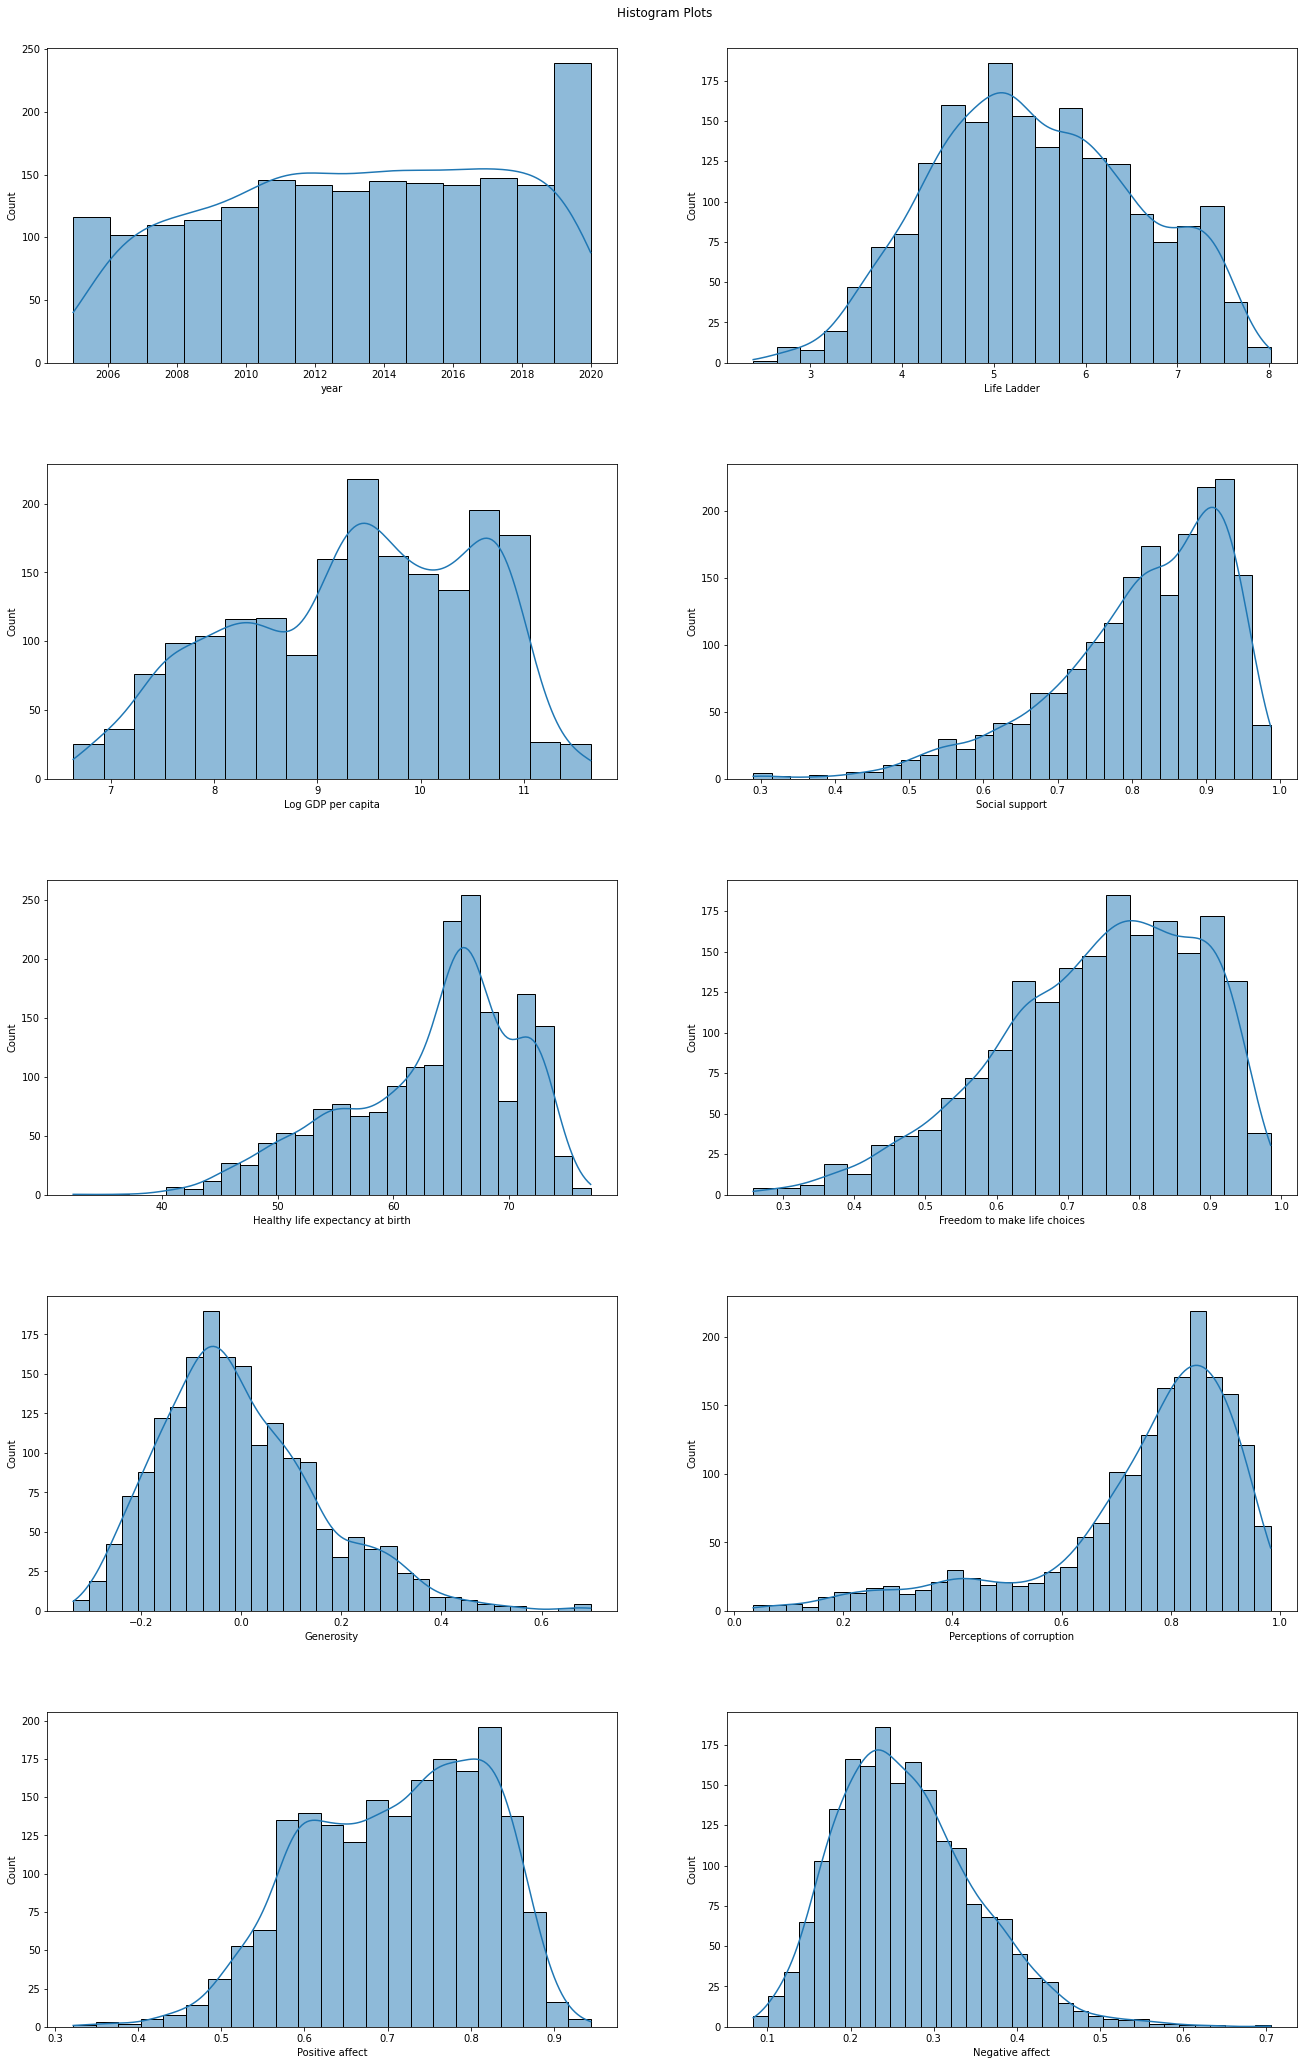

In [24]:
f , axes = plt.subplots(5 , 2 , figsize = (20 , 30))
f. tight_layout(pad=8)
f.suptitle('Histogram Plots')
cols = df.select_dtypes(exclude='object').columns

x_axes =0
y_axes =0


for col in cols:
   sns.histplot(data=df , x=col , kde=True , ax=axes[x_axes ,  y_axes])


   if y_axes == 1:
     y_axes= 0
     x_axes += 1
  
   else:
    y_axes += 1

plt.savefig('plots/histogram_plots.png')
plt.show()

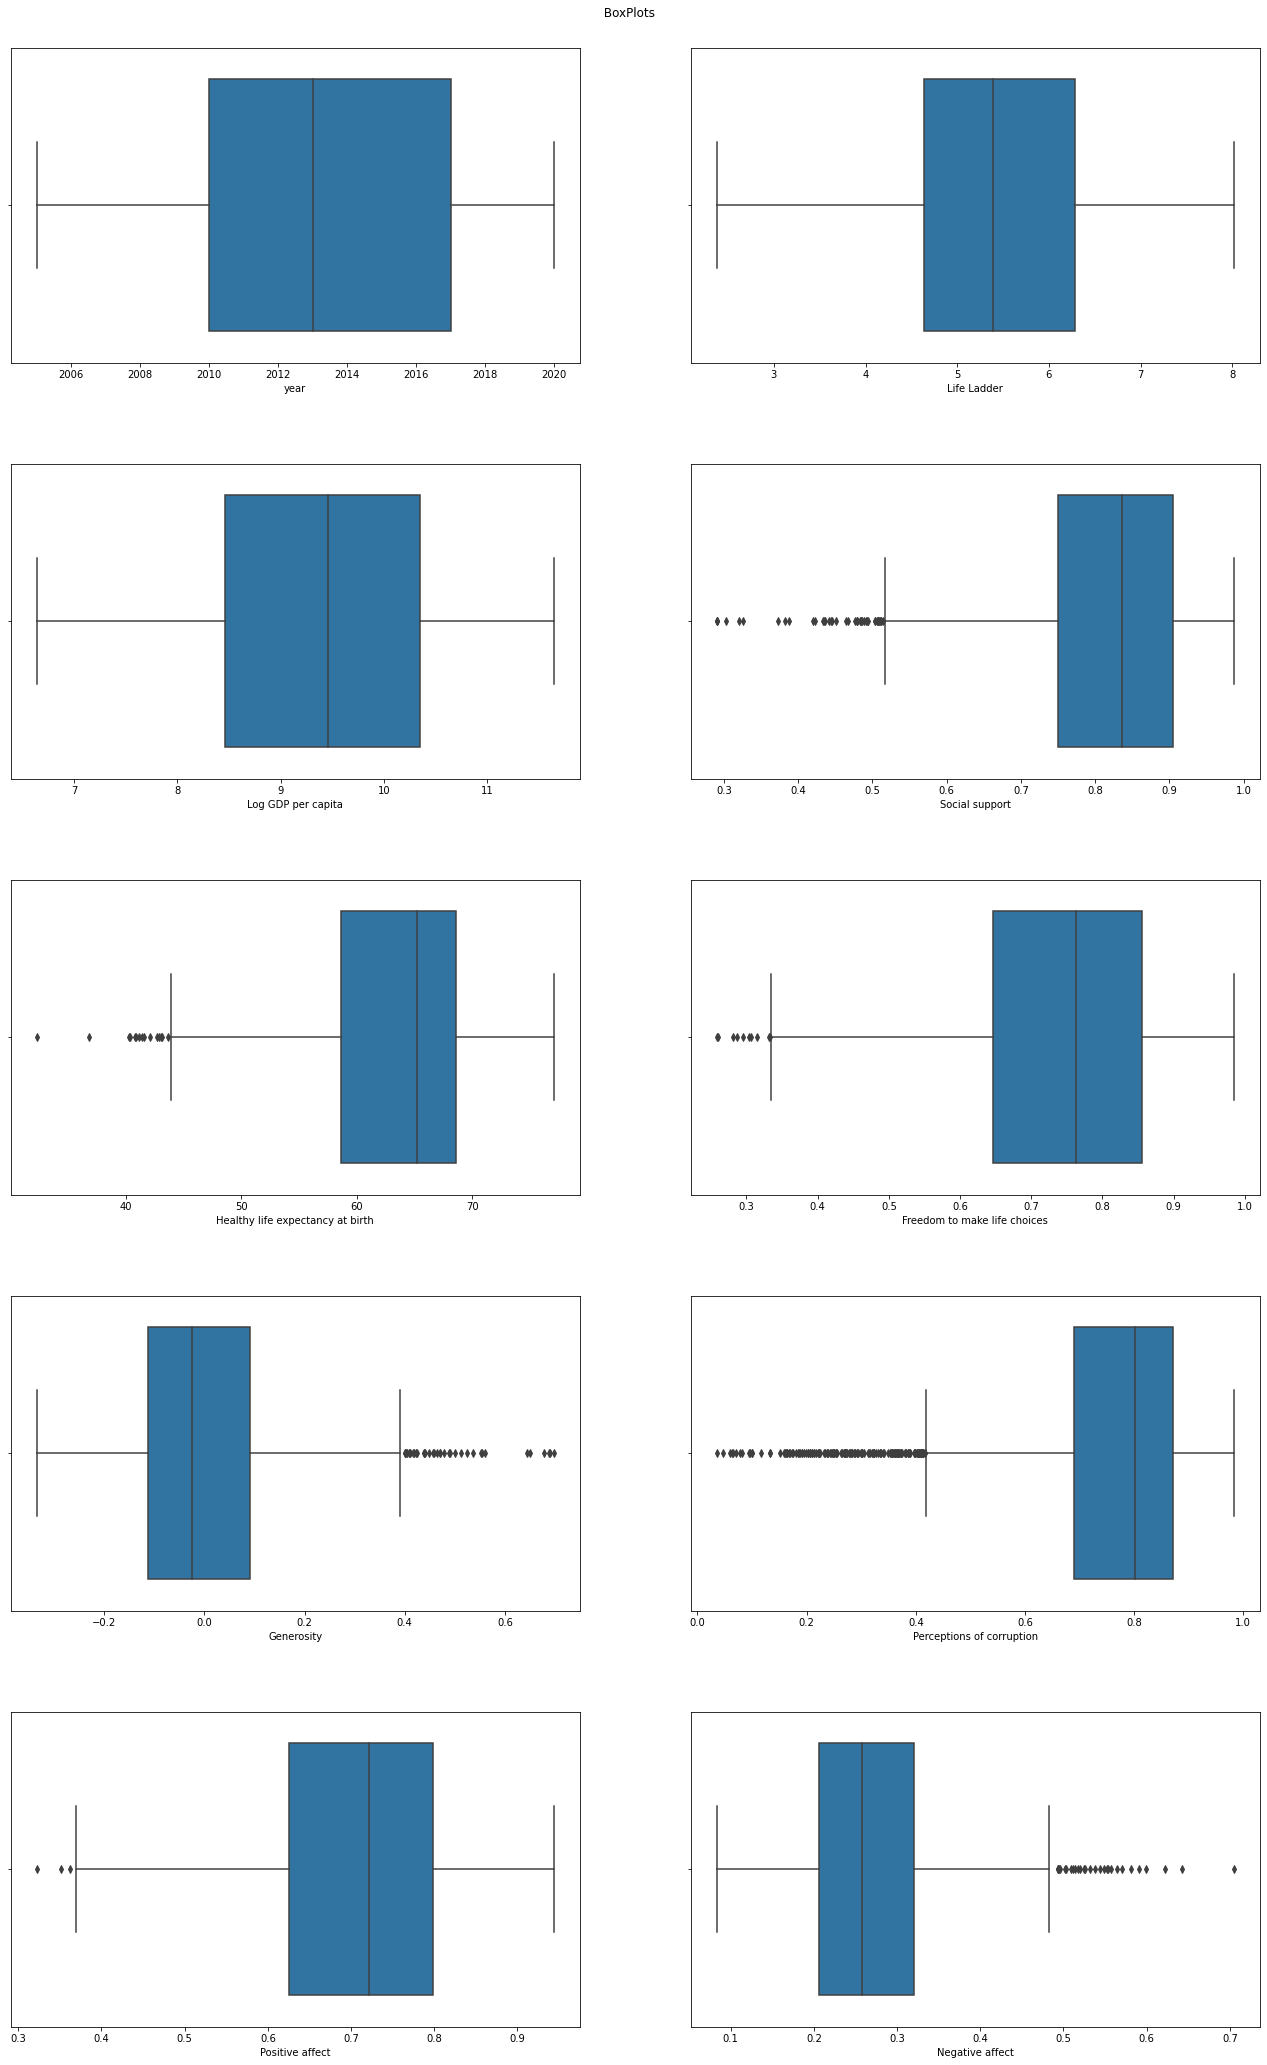

In [25]:
f , axes = plt.subplots(5 , 2 , figsize = (20 , 30))
f. tight_layout(pad=8)
f.suptitle(' BoxPlots')
cols = df.select_dtypes(exclude='object').columns

x_axes =0
y_axes =0


for col in cols:
   sns.boxplot(data=df , x=col ,   ax=axes[x_axes ,  y_axes])


   if y_axes == 1:
     y_axes= 0
     x_axes += 1
  
   else:
    y_axes += 1

plt.savefig('plots/Box_plots.png')
plt.show()

In [26]:
year_group=df.groupby(by='year').sum()

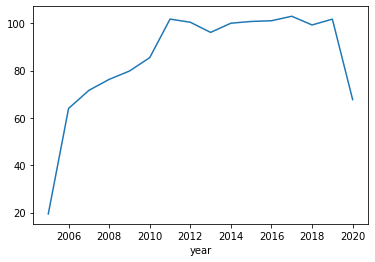

In [27]:
year_group['Positive affect'].plot()
plt.savefig('plots/Positive_affect_plot.png')

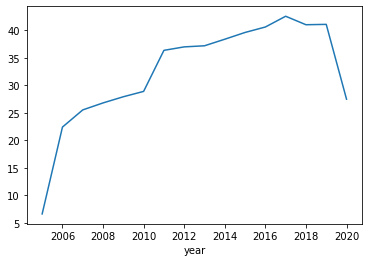

In [28]:
year_group['Negative affect'].plot()
plt.savefig('plots/Negative_affect_plot.png')

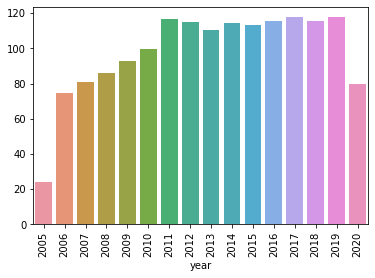

In [29]:
ax1=sns.barplot(x=year_group.index , y=year_group['Social support'].values)
ax1.tick_params(axis= 'x' , rotation=90)
plt.savefig('plots/social_support_plot.png')

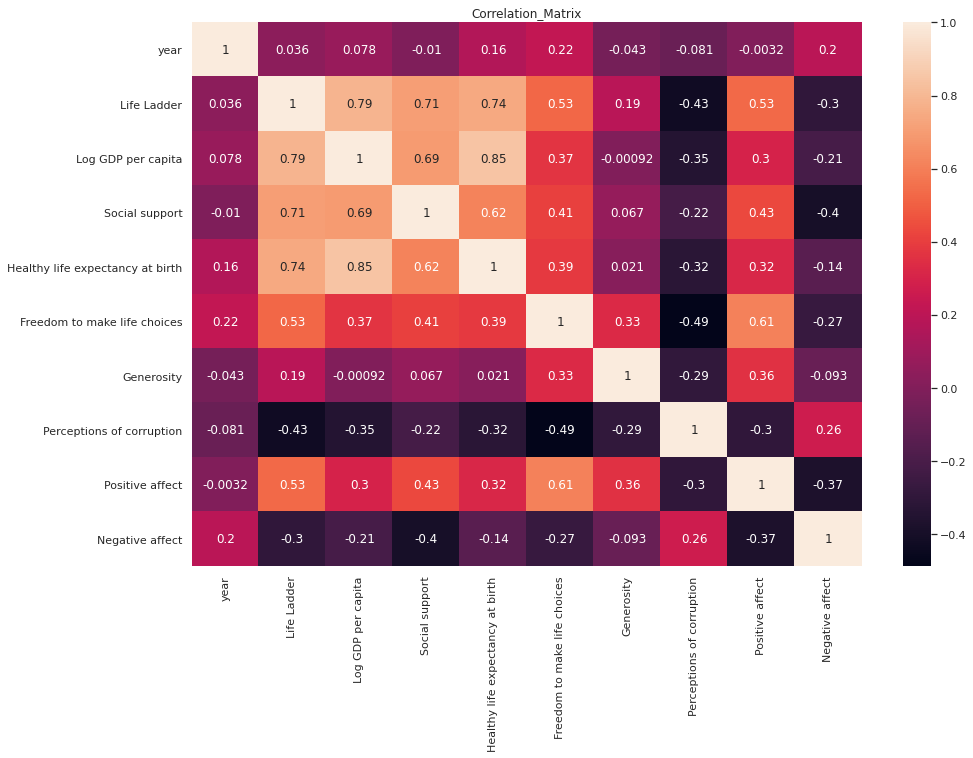

In [30]:
sns.set(rc={'figure.figsize' :(15,10)})
sns.heatmap (df.corr() , annot=True)
plt.title('Correlation_Matrix')
plt.savefig('plots/Correlation_Matrix.png')

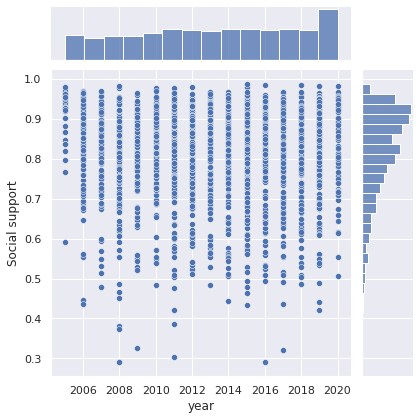

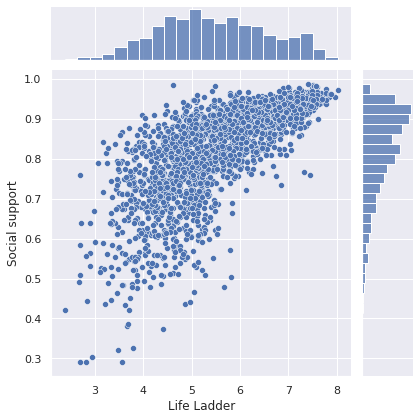

In [31]:
sns.jointplot(data=df , x='year',  y='Social support')
sns.jointplot(data=df , x='Life Ladder' , y='Social support')
plt.savefig('plots/joint_plot.png')

In [32]:
import os
from os  import listdir , mkdir

In [33]:
all_files = os.listdir('plots')
reports= [f'plots/{file}'for file in all_files]

In [3]:
!pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=697896d6ebf125a67143b52fc9a49aba21a2989e0e11273ffdd6b40f889f2a23
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built FPDF


In [4]:
from fpdf import FPDF

In [5]:
WİDTH = 210
HEIGHT = 297

In [34]:
pdf= FPDF()
pdf.set_font( 'Arial', 'B', 56)
pdf.add_page()

pdf.cell(190,  20, txt= 'REPORT', align='C')

for report in reports:
  pdf.add_page()
  pdf.set_font("Arial", "B", 24)
  pdf.cell(190 , 20 , txt =report , align='C')
  
  pdf.image(report,  5,  30, WİDTH-5)

pdf.output('Countries_report.pdf')

''